In [2]:
import json
import pandas as pd

data = []

with open('../DATA/JSON/all_data.json') as file:
    data = json.load(file)

In [3]:
data_list = []

for i in data:
    eid = i['abstracts-retrieval-response']['coredata']['eid']
    cite_count = i['abstracts-retrieval-response']['coredata']['citedby-count']
    item = i['abstracts-retrieval-response']['item']
    try:
        if (item['xocs:meta'] != None):
            if (item['xocs:meta']['xocs:funding-list'] != None):
                funding = item['xocs:meta']['xocs:funding-list']['xocs:funding']
                data_list.append([eid, len(funding), cite_count])

    except:
        data_list.append([eid, 0, cite_count])

In [4]:
funding_cite_df = pd.DataFrame(data_list, columns=['Eid', 'Funding Count', 'Cite-By Count'])

In [5]:
funding_cite_df['Cite-By Count'] = funding_cite_df['Cite-By Count'].fillna(0)
funding_cite_df.isna().sum()

funding_cite_df['Cite-By Count'] = funding_cite_df['Cite-By Count'].apply(lambda x : int(x))

funding_cite_df['Has Funding'] = funding_cite_df['Funding Count'].apply(lambda x : 0 if x == 0 else 1)

funding_cite_df['Has Cite-By'] = funding_cite_df['Cite-By Count'].apply(lambda x : 0 if x == 0 else 1)

In [6]:
funding_cite_df

,Eid,Funding Count,Cite-By Count,Has Funding,Has Cite-By
0,2-s2.0-85053164279,7,8,1,1
1,2-s2.0-85049101440,3,33,1,1
2,2-s2.0-85054140369,3,8,1,1
3,2-s2.0-85097515350,0,0,0,0
4,2-s2.0-85041527766,0,12,0,1
...,...,...,...,...,...
20211,2-s2.0-85152540548,2,1,1,1
20212,2-s2.0-85132634561,5,17,1,1
20213,2-s2.0-85150789915,3,0,1,0
20214,2-s2.0-85165609857,3,0,1,0


In [7]:
funding_cite_df.to_csv('old_funding_cite.csv', index=False)

In [8]:
# funding_cite_df.groupby('Has Funding')['Cite-By Count'].sum().reset_index()

In [9]:
# perc = funding_cite_df.groupby('Has Funding')['Has Cite-By'].sum().reset_index()
# perc['Has Cite-By'] = perc['Has Cite-By'].apply(lambda x : x / perc['Has Cite-By'].sum() * 100)
# perc

In [10]:
# funding_count_list = funding_cite_df['Funding Count'].to_list()
# cite_by_count_list = funding_cite_df['Cite-By Count'].to_list()
# has_funding_list = funding_cite_df['Has Funding'].to_list()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
plot_data = funding_cite_df[['Funding Count', 'Cite-By Count', 'Has Funding', 'Has Cite-By']]
plot_data

,Funding Count,Cite-By Count,Has Funding,Has Cite-By
0,7,8,1,1
1,3,33,1,1
2,3,8,1,1
3,0,0,0,0
4,0,12,0,1
...,...,...,...,...
20211,2,1,1,1
20212,5,17,1,1
20213,3,0,1,0
20214,3,0,1,0


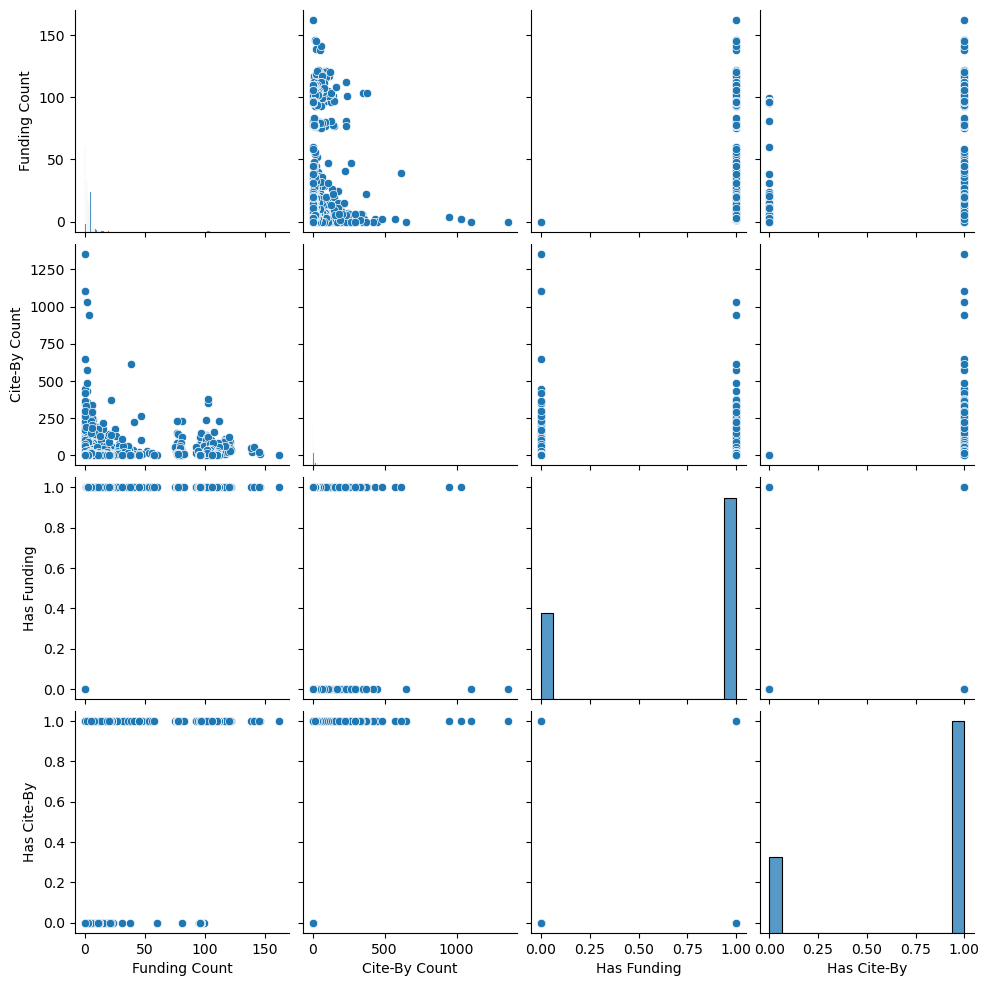

In [13]:
sns.pairplot(plot_data)


In [14]:
plot_data = funding_cite_df['Cite-By Count'].value_counts().reset_index()

In [15]:
plot_data = funding_cite_df['Cite-By Count'].value_counts().reset_index()

x = plot_data['Cite-By Count'].to_list()
y = plot_data['count'].to_list()

In [16]:
hist_data = []

for i in x:
    for j in y:
        hist_data.append(i)

(array([11605., 11394.,  8440.,  4642.,  2321.,  1688.,  2110.,   422.,
          422.,     0.,   211.,   422.,     0.,     0.,     0.,     0.,
            0.,   211.,   211.,     0.,   211.,     0.,     0.,     0.,
          211.]),
 array([   0.  ,   54.24,  108.48,  162.72,  216.96,  271.2 ,  325.44,
         379.68,  433.92,  488.16,  542.4 ,  596.64,  650.88,  705.12,
         759.36,  813.6 ,  867.84,  922.08,  976.32, 1030.56, 1084.8 ,
        1139.04, 1193.28, 1247.52, 1301.76, 1356.  ]),
 <BarContainer object of 25 artists>)

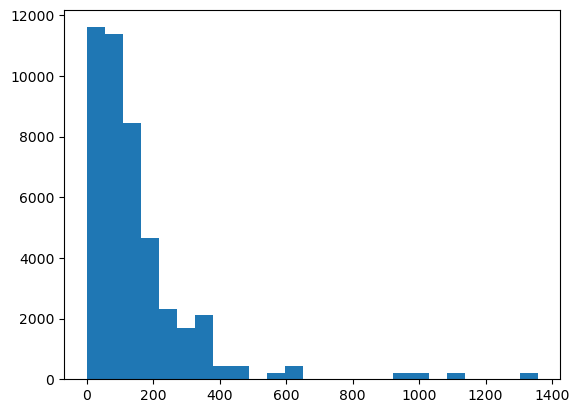

In [17]:
plt.hist(hist_data, bins=25)